In [1]:
import sys
import os
searchPath=os.path.abspath('..')
sys.path.append(searchPath)

In [2]:
from kmeans_base import KMeansBase
from kmeans_plus import KMeansPlusPlus
import time

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import datasets

import numpy as np

from utils.misc_utils import distance, sortLabel
from kmeans.kmeans_base import KMeansBase

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
allData = {"iris":datasets.load_iris().data, "boston":datasets.load_boston().data, "digits":datasets.load_digits().data}
models = {"KmeansBase":KMeansBase, "kmeans++":KMeansPlusPlus, "sklearnKmeans":KMeans}

dataset=iris model=KmeansBase takeTime=0.32797


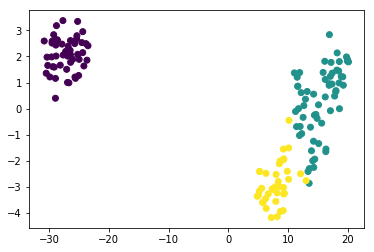

dataset=iris model=kmeans++ takeTime=0.33671


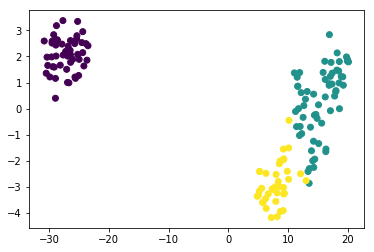

dataset=iris model=sklearnKmeans takeTime=0.02354


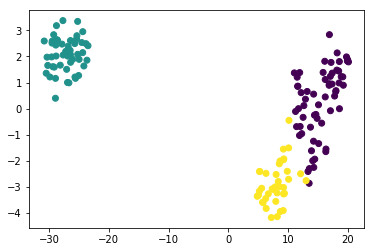

----------------------------------------------------------------------------------------------------
dataset=boston model=KmeansBase takeTime=0.96415


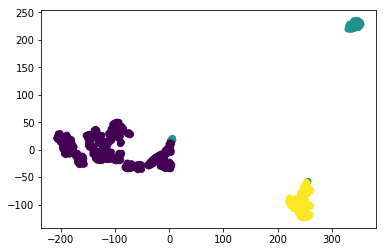

dataset=boston model=kmeans++ takeTime=0.58167


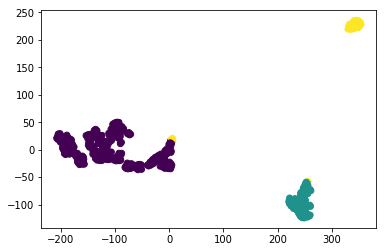

dataset=boston model=sklearnKmeans takeTime=0.02329


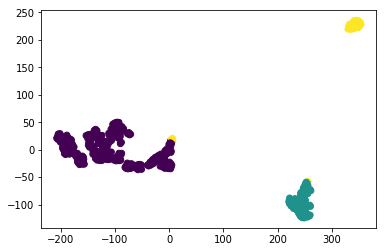

----------------------------------------------------------------------------------------------------
dataset=digits model=KmeansBase takeTime=39.7536


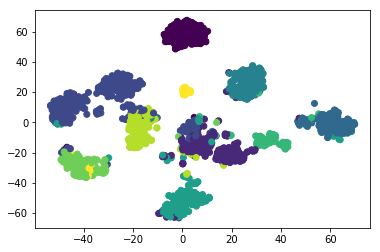

dataset=digits model=kmeans++ takeTime=31.46845


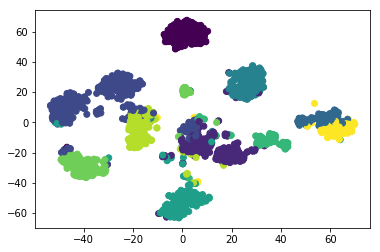

dataset=digits model=sklearnKmeans takeTime=0.17651


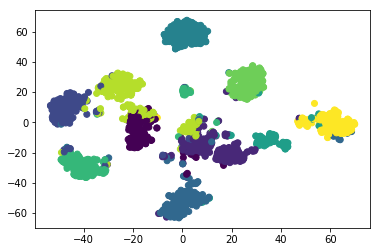

----------------------------------------------------------------------------------------------------


In [4]:
for dataName, value in allData.items():
    n_clusters = 3
    init = "k-means++"
    if dataName == "digits":
        n_clusters = 10
    #降维
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(value)
    for modelName, model in models.items():
        startTime = time.time()
        init = "k-means++"
        if modelName == "KmeansBase":
            init = "random"
        labels = model(n_clusters = n_clusters, init = init).fit_predict(value)
        takeTime = time.time() - startTime
        print("dataset=%s model=%s takeTime=%s"%(dataName, modelName, round(takeTime, 5)))
        plt.scatter(X_tsne[:, 0],X_tsne[:, 1], c=labels)
        plt.show()
    print("-" * 100)